In [2]:
import numpy as np
import pandas as pd

red = pd.read_csv("winequality-red.csv")

red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

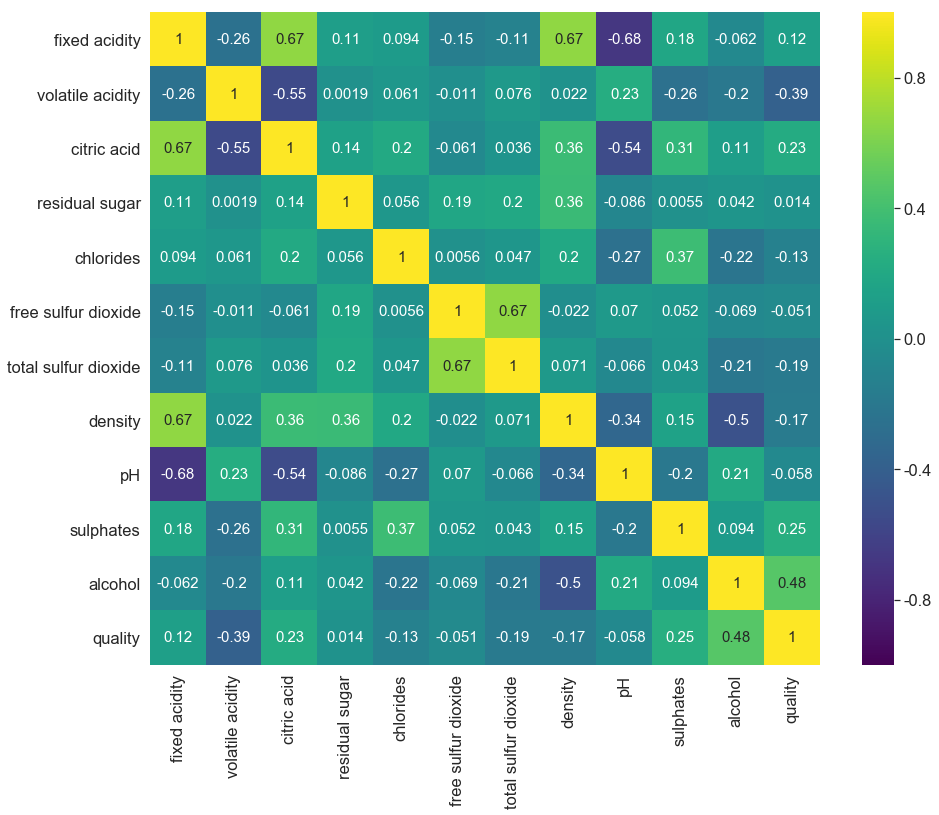

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

corr = red.corr()
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap="viridis", annot=True)
plt.show()

In [30]:
corr.transpose().loc[:, ["quality"]].sort_values(by="quality",ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


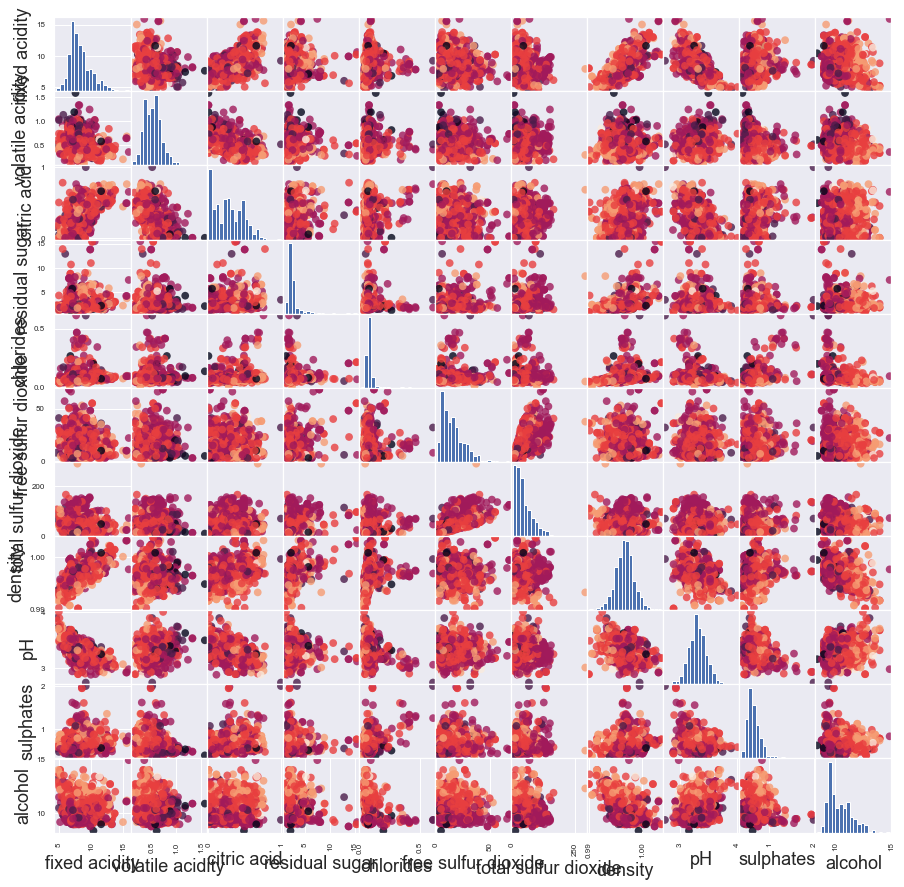

In [28]:
from sklearn.model_selection import train_test_split

X = red.iloc[:,:-1]
y = red.iloc[:,[-1]]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

plt.rcParams["font.size"] = 7
# 산점도 행렬
pd.plotting.scatter_matrix(X_train, c=y_train['quality'], figsize=(15, 15),
                           marker='o', hist_kwds={'bins':20},
                           s=60, alpha=0.8)
plt.show()

In [39]:
X.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

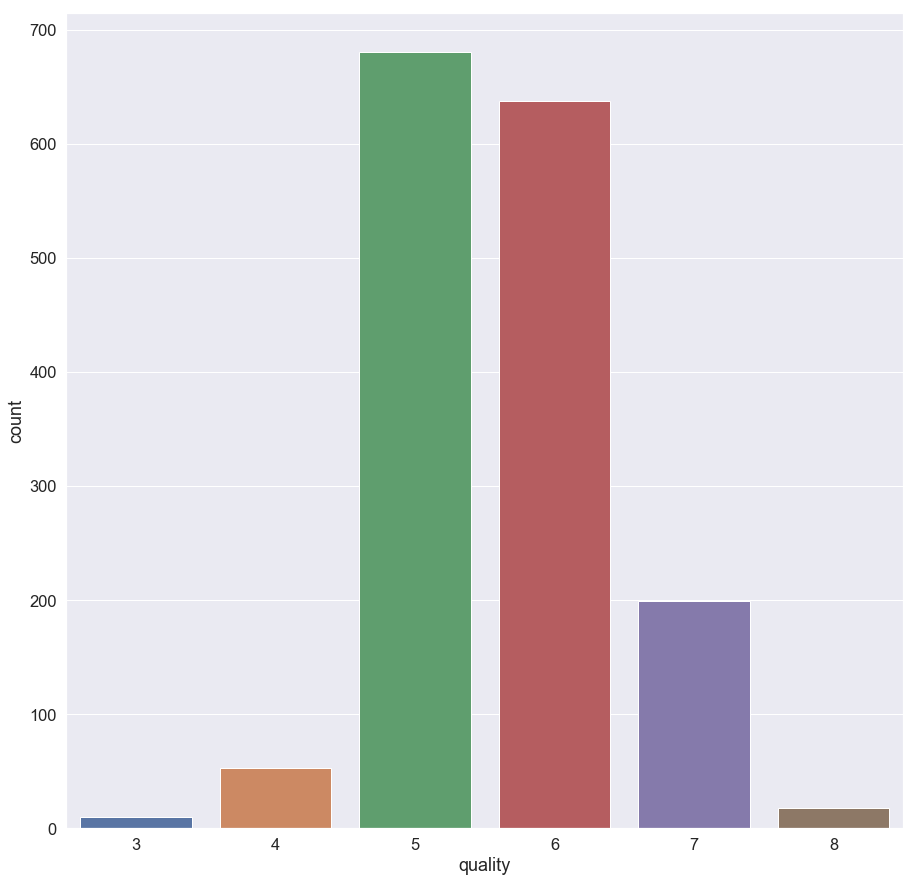

In [45]:
sns.countplot(x='quality', data=red)

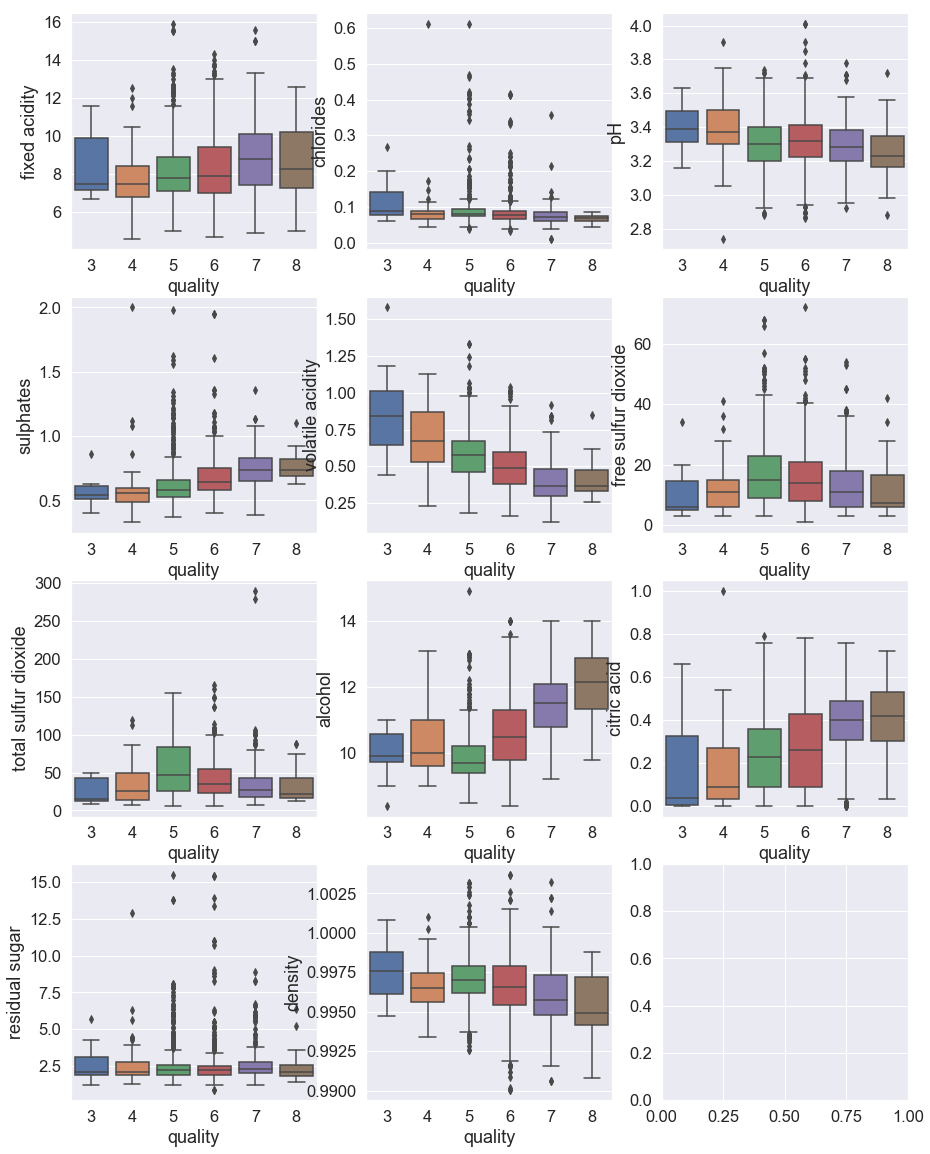

In [63]:
plt.rcParams["figure.figsize"] = (15,20)

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    sns.boxplot(x='quality', y=col, data=red, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

In [51]:
len(X.columns.to_list())

11